### Hugo Englund | 2020-11-16

# Laboration 1
## Outline
The outline for the laboration is as follows:


1.   Import and explore the dataset and its features.
2.   Build and train a convolutional neural network (CNN) with the ultimate purpose to classify the different clothings in the dataset with an accuracy above 90%. Further, the types of clothing that most often are misclassified are analyzed for this model. 
3. Vary the learning rate and the filter size of the model in step 2, respectively, and analyze the effects of these variations and the reasons for them.
4. Compare the optimizers ```SGD``` and ```Adam``` from Keras, in the model in step 2.
5. Execute three runs of training and testing of the model in step 2, and analyze the variation in the test results.






### 1. Exploratory Data Analysis (EDA)

#### Import relevant packages

In [ ]:
# import relevant packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.3.0


#### Import the Fashion MNIST data set

In [ ]:
# fetch data
fashion_mnist = tf.keras.datasets.fashion_mnist

# Save class names since they are not included in the imported data set
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# load data and split to train and test sets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### Check the distribution between training and testing images

In [ ]:
# check dimensions of the data
print("Dimensions of training set: {}".format(train_images.shape))
print("Dimensions of training labels: {}".format(train_labels.shape))
print("Dimensions of test set: {}".format(test_images.shape))
print("Dimensions of test labels: {}".format(test_labels.shape))

Dimensions of training set: (60000, 28, 28)
Dimensions of training labels: (60000,)
Dimensions of test set: (10000, 28, 28)
Dimensions of test labels: (10000,)


#### Visualize the data

In [ ]:
# visualize the structure of an arbitrary clothing object
id = np.random.randint(0, len(train_images))
fashion_object = train_images[id]
class_of_object = class_names[train_labels[id]]
print("The choosen fashion object is: {}\n".format(class_of_object))
print("The features (28x28 pixels) of the {}:".format(class_of_object))
pd.DataFrame(fashion_object)

The choosen fashion object is: Sandal

The features (28x28 pixels) of the Sandal:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,4,0,0,0,0,0,1,1,0,0


Visualization of 25 random fashion objects:



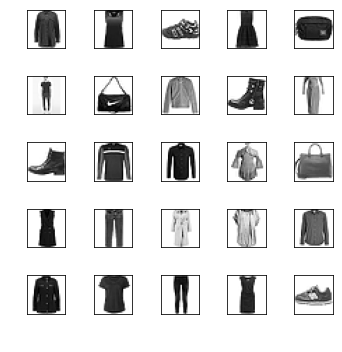

In [ ]:
# change colors in matplotlib due to dark mode in Google colab...
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

# plots of 25 random fashion objects 
dim = 5
sample_ids = np.random.randint(0, len(train_images), dim**2)
sample_images = train_images[sample_ids, :]
sample_labels = train_labels[sample_ids]
fig, axes = plt.subplots(dim, dim, figsize=(dim,dim), sharex=True, sharey=True) 

for id in range(dim**2):
    row = id // dim 
    col = id % dim
    axis = axes[row, col]

    img = sample_images[id,:]
    axis.imshow(img, cmap="gray_r")
    axis.set(xLabel=class_names[sample_labels[id]])

plt.tight_layout()
print("Visualization of {} random fashion objects:\n".format(dim**2))
plt.show()

Frequency table of training set:
Ankle boot     6000
T-shirt/top    6000
Coat           6000
Bag            6000
Trouser        6000
Pullover       6000
Dress          6000
Sneaker        6000
Shirt          6000
Sandal         6000
Name: type, dtype: int64 



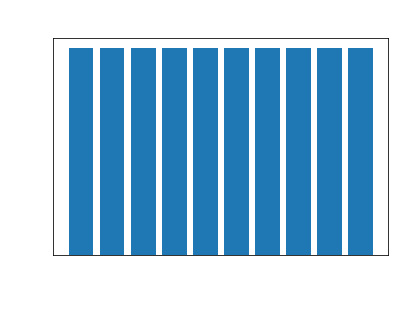

Frequency table of test set:
Coat           1000
Sandal         1000
Pullover       1000
Dress          1000
Sneaker        1000
T-shirt/top    1000
Ankle boot     1000
Bag            1000
Trouser        1000
Shirt          1000
Name: type, dtype: int64 



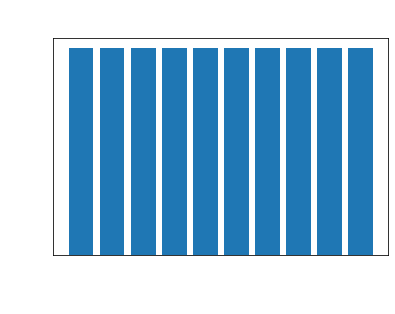

In [ ]:
# visualize the distribution of clothing classes
# in the training set
categories_train = [class_names[id] for id in train_labels]
classes = pd.DataFrame(categories_train, columns=["type"])
counts = classes["type"].value_counts()
print("Frequency table of training set:\n{}".format(counts), "\n")
dist = counts.to_dict()
plt.bar(dist.keys(), dist.values())
plt.title("Bar diagram of the different clothings\nin the training set")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# visualize the distribution of clothing classes
# in the testing set
categories_test = [class_names[id] for id in test_labels]
classes = pd.DataFrame(categories_test, columns=["type"])
counts = classes["type"].value_counts()
print("Frequency table of test set:\n{}".format(counts), "\n")
dist = counts.to_dict()
plt.bar(dist.keys(), dist.values())
plt.title("Bar diagram of the different clothings\nin the test set")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### Conclusions from the EDA
From the EDA, we can conclude that there are 60000 training images uniformely distributed over each clothing class. In the test set, there are 10000 images also uniformely distributed over each class. Moreover, there are 10 unique classes where each corresponds to some type of "fashion".

Further, each image has 28x28 pixels in grey scale, which means that we have to add an extra dimension as the RGB-channel in order for the images to applicable in the model. The labels for the train and test are both 1D-vectors, which implies that each label have to be converted to one-hot encoded vectors in order to be correctly used in the CNN. 


### 2. Modelling
Now, we proceed by building and training a CNN.

The procedure:
1. Reformat data in order to make it applicable in the model.
2. Create a model inspired by the VGGNet.
3. Elaborate with number and dimension of convolutional layers.
4. Elaborate with batch normalization and dropout.
5. Validate the model.
6. Test the model.

#### Data preparation
Before the modelling, we prepare the data by:
1. Normalizing the data to a range between 0 and 1, in order for the features in each image to be in a common scale.
2. Adding another dimension to the images as the RGB-channel, required in the CNN.
3. Converting the labels to one-hot encoded vectors since we have multiple outputs in the model.

In [ ]:
from keras.utils.np_utils import to_categorical 

# normalize image pixels
train_images, test_images = train_images / 255.0, test_images / 255.0

# reshape images to have "RGB-channel"
train_images, test_images = train_images.reshape(60000, 28, 28, 1), test_images.reshape(10000, 28, 28, 1)

# convert labels to one-hot encoded vectors
train_labels, test_labels = to_categorical(train_labels, num_classes=10), to_categorical(test_labels, num_classes=10)

#### Build the model
The model architecture is inspired by the [VGGNet](https://arxiv.org/pdf/1409.1556.pdf). 

In the model, there are two convolutional layers followed by a pooling layer. Then two additional convolutional layers with twice the filter size, followed by a pooling layer once again. Additionally, there are two dense layer, where the second one is the output layer. 

The kernel size is 3x3 and the strides are 1x1 throughout the network. Moreover, batch normalization and dropout are applied between the pairs of convolutional and pooling layers, as well as between the dense layers.

Lastly, the optimizer algorithm used is stochastic gradient descent (SGD), with Nesterov momentum and learning rate decay.


In [ ]:
# import relevant layers and optimizers
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD 

# function to create a CNN on the run
def init_cnn(n_filters, optimizer, strides=(1, 1)): 
  # initiate model
  cnn = tf.keras.Sequential()

  # input layer
  cnn.add(Conv2D(n_filters,
                kernel_size=(3, 3),
                input_shape=(28, 28, 1),
                strides=strides,
                padding="same",
                activation="relu"))
  cnn.add(Conv2D(n_filters,
                kernel_size=(3, 3),
                strides=strides,
                padding="same",
                activation="relu"))
  cnn.add(BatchNormalization())
  cnn.add(MaxPool2D(pool_size=(2,2)))
  cnn.add(Dropout(0.25))

  # convolutional layer
  cnn.add(Conv2D(n_filters*2,
                kernel_size=(3, 3),
                strides=strides,
                padding="same",
                activation="relu"))
  cnn.add(BatchNormalization())
  cnn.add(Conv2D(n_filters*2,
                kernel_size=(3, 3),
                strides=strides,
                padding="same",
                activation="relu"))
  cnn.add(BatchNormalization())
  cnn.add(MaxPool2D(pool_size=(2,2)))
  cnn.add(Dropout(0.25))

  # flatten to enable prediction
  cnn.add(Flatten())

  # dense layer
  cnn.add(Dense(512, activation="relu"))
  cnn.add(BatchNormalization())
  cnn.add(Dropout(0.5))

  # output layer with softmax activation
  cnn.add(Dense(10, activation="softmax"))

  # Compile the model
  cnn.compile(optimizer = optimizer, 
              loss = "categorical_crossentropy", 
              metrics=["accuracy"])
  return cnn

#### Initiate and summarize the model

In [ ]:
# define parameters
filter_size = 32
learning_rate = 0.01
epochs = 25

# define optimizer for the model
main_optimizer = SGD(lr=learning_rate, momentum=0.9, nesterov=True, decay=learning_rate/epochs)

# initialize CNN
main_cnn = init_cnn(filter_size, main_optimizer)

# print out summary of the model
main_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        2

#### Train the model
The validation split is set to the fraction corresponding to exactly 10000 images. Thus, we get an approximate 70`/`15`/`15%-split between training, testing and validation images, respectively. 

In addition, early stopping with a patience of four epochs is used in the model, which is that if the validation loss is no longer decreasing in four consecutive epochs, the training is terminated. This used to prevent excessive training times and foremost overfitting.

In [ ]:
# define parameters
validation_split = 10000 / len(train_images) # to get 10000 validation images each epoch
batch_size = 100
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=4)]

# fit the model
main_history = main_cnn.fit(train_images,
                  train_labels,
                  epochs=epochs,
                  batch_size=batch_size,
                  validation_split=validation_split,
                  callbacks=my_callbacks,
                  verbose=2)

Epoch 1/25
500/500 - 5s - loss: 0.5615 - accuracy: 0.8054 - val_loss: 0.4587 - val_accuracy: 0.8242
Epoch 2/25
500/500 - 4s - loss: 0.3647 - accuracy: 0.8684 - val_loss: 0.3336 - val_accuracy: 0.8770
Epoch 3/25
500/500 - 4s - loss: 0.3137 - accuracy: 0.8861 - val_loss: 0.2679 - val_accuracy: 0.9032
Epoch 4/25
500/500 - 4s - loss: 0.2836 - accuracy: 0.8964 - val_loss: 0.2444 - val_accuracy: 0.9113
Epoch 5/25
500/500 - 4s - loss: 0.2675 - accuracy: 0.9035 - val_loss: 0.2446 - val_accuracy: 0.9100
Epoch 6/25
500/500 - 4s - loss: 0.2519 - accuracy: 0.9091 - val_loss: 0.2213 - val_accuracy: 0.9189
Epoch 7/25
500/500 - 4s - loss: 0.2428 - accuracy: 0.9115 - val_loss: 0.2234 - val_accuracy: 0.9168
Epoch 8/25
500/500 - 4s - loss: 0.2346 - accuracy: 0.9156 - val_loss: 0.2086 - val_accuracy: 0.9240
Epoch 9/25
500/500 - 4s - loss: 0.2239 - accuracy: 0.9181 - val_loss: 0.2219 - val_accuracy: 0.9187
Epoch 10/25
500/500 - 4s - loss: 0.2194 - accuracy: 0.9215 - val_loss: 0.2033 - val_accuracy: 0.9261

#### Evaluate the model
The model is evaluated by analyzing the curves of loss and accuracy in both training and validation. 

Ideally, the curves of training and validation should be more or less identical in both accuracy and loss towards the last epochs, in order to obtain a generalized model.

However, there can be cases where the validation loss is consistently greater than the training loss. This indicates underfitting. 

On the contrary, if the validation loss follows the training loss and then starts to deviate by increasing, we are overfitting.

There could also be cases where the validation loss is consistently lesser than the training loss. There are three main reasons for this:
1. Regularization is applied during training, but not during validation.
2. Training loss is computed during each epoch, while validation loss is computed after each epoch. 
3. The validation set is "easier" than the training set.

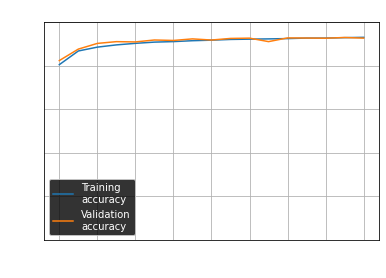

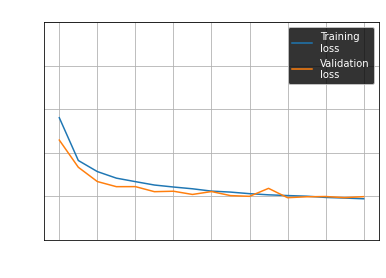

In [ ]:
# make legend visible due to dark mode in Google colab
plt.rcParams["legend.facecolor"] = "black"

# plots accuracy and loss for training and validation, respectively
def plot_performance(history):
  # plot accuracy during training and validation
  plt.plot(history.history["accuracy"], label="Training\naccuracy")
  plt.plot(history.history["val_accuracy"], label="Validation\naccuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.ylim([0, 1])
  plt.legend(loc="best")
  plt.title("Training and validation accuracies")
  plt.grid(b=True)
  plt.show()

  # plot loss during training and validation
  plt.plot(history.history["loss"], label="Training\nloss")
  plt.plot(history.history["val_loss"], label='Validation\nloss')
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.ylim([0, 1])
  plt.legend(loc="best")
  plt.title("Training and validation losses")
  plt.grid(b=True)
  plt.show()
  return

plot_performance(main_history)

#### Test the model

In [ ]:
# test the model and print out the results
test_loss, test_acc = main_cnn.evaluate(test_images, test_labels, verbose=0)
print("Test loss: {0:.{1}}".format(test_loss, 4))
print("Test accuracy: {0:.{1}}".format(test_acc, 4))

Test loss: 0.2154
Test accuracy: 0.9212


#### Model conclusions
Form the accuracy and loss plots, it can be seen that validation and accuracy loss barely differs from those in the training. This is a quite clear indication of adequately fitted model, neither over- or underfitted.

The test accuracy is 92% and the loss is approximately 0.22, which is descent for this relatively small model. If we keep the short training time in mind, we can conclude that these are good results.

#### Confusion matrix and classification report
Plot the confusion matrix and classification report in order to determine which classes that are misclassified more than others.

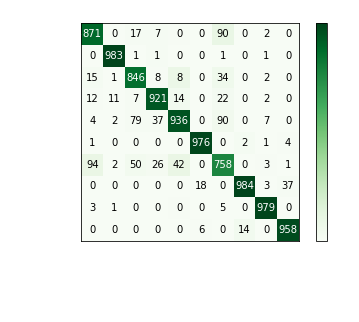


Classification report:
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.87      0.88      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.93      0.85      0.88      1000
       Dress       0.93      0.92      0.93      1000
        Coat       0.81      0.94      0.87      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.78      0.76      0.77      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
# obtain predictions on test set
predictions = main_cnn.predict(test_images)

# convert predictions and labels to 1D-vectors
predictions = np.argmax(predictions, axis=1)
labels = np.argmax(test_labels, axis=1)

# calculate confusion matrix
confusion_matrix = tf.math.confusion_matrix(labels, predictions, 10)

# number of classes
num_classes = 10

# plot confusion matrix
# confusion matrix: y-axis = predicted labels, x-axis = true labels
plt.imshow(confusion_matrix, cmap=plt.cm.Greens)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(range(num_classes), class_names, rotation=90)
plt.yticks(range(num_classes), class_names)
plt.title('Confusion matrix ')
plt.colorbar()
dim = num_classes
for index in range(dim**2):
    row = index // dim
    col = index % dim
    plt.text(row, col, confusion_matrix[row][col].numpy(), 
             horizontalalignment="center",
             verticalalignment="center",
             color="white" if row == col else "black")
plt.show()

# create and print classification report
from sklearn.metrics import classification_report
print("\nClassification report:\n{}".format(classification_report(labels, predictions, target_names=class_names)))

##### Misclassifications
In the confusion matrix, it can be seen that shirts are the most problematic clothing. The model's precision and recall for shirts are by far the lowest. 

The model mixes shirts with mainly t-shirts/tops, pullovers and coats. Since the shirts are mixed with multiple classe, it also goes the other way around. For example, the t-shirts and the coats are mixed up with shirts, respectively. This explains the lower precision and recall for these, as well.

Intuitively, this is due to the fact that shirts can be both short- and long-sleeved. For instance, the only thing that differ between a t-shirt and a short-sleeved shirt is the buttons on the shirt. Similar reasoning applies for long-sleeved shirts and, e.g., coats or pullovers.

I believe that this feature is too small to be detected by this particular model. Hence, a more complex model would be necessary to distiungish between these types of clothing.

#### Parameter Experimentation
In order to analyze the effect of different learning rates and filter sizes, these parameters are decreased/increased in relation to the model created above. The "baseline" parameter values are a filter size of 32 and a learning rate of 0.01. 

The new filter sizes are 16 and 64 (divided and multiplied by 2, respectively), which results in a filter size of 128 in the second part of convolutional layers. The new learning rates are 0.002 and 0.05 (divided and multiplied by 5, respectively).

Model with filter size = 16.0:



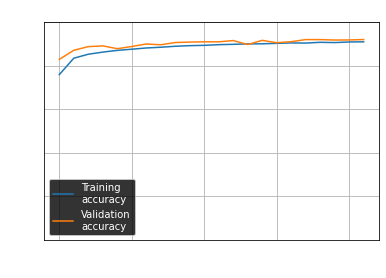

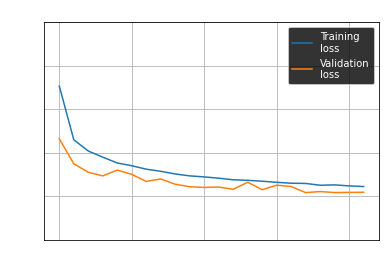

Training time: 0.82 min
Test loss: 0.2334
Test accuracy: 0.9146

Model with filter size = 64:



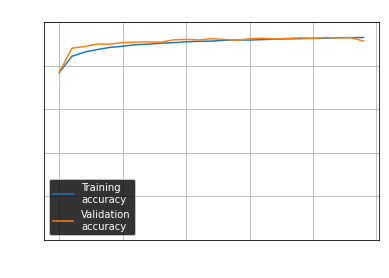

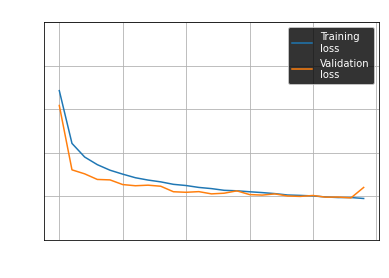

Training time: 3.4 min
Test loss: 0.2542
Test accuracy: 0.9081


Model with learning rate = 0.05:



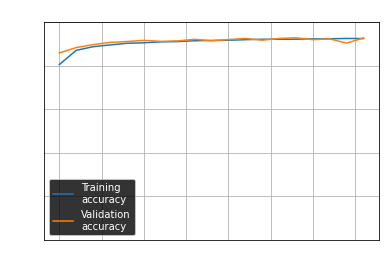

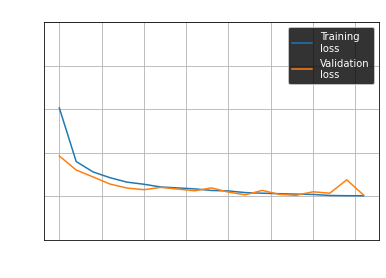

Training time: 1.23 min
Test loss: 0.2221
Test accuracy: 0.9187


Model with learning rate = 0.002:



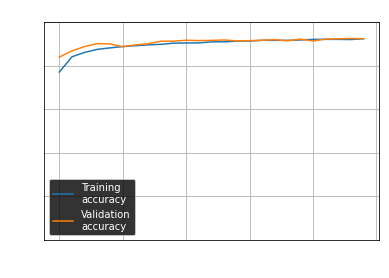

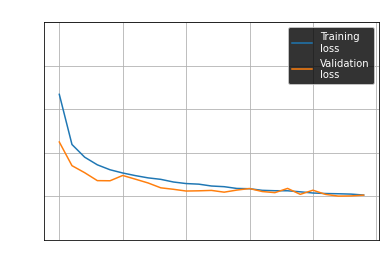

Training time: 1.61 min
Test loss: 0.2194
Test accuracy: 0.9211



In [ ]:
import time # to create training timer

# build four new models: 2 with different learning_rate, 2 with different filter_size
filter_sizes = [32/2, 32*2]
learning_rates = [0.01*5, 0.01/5]
for i in range(4):
  if i < 2:
    start = time.time()
    print("Model with filter size = {}:\n".format(filter_sizes[i]))
    # create and train model with increased/decreased filter size
    cnn_filter = init_cnn(filter_sizes[i], main_optimizer)
    history_filter = cnn_filter.fit(train_images,
                                    train_labels,
                                    epochs=epochs,
                                    batch_size=batch_size,
                                    validation_split=validation_split,
                                    callbacks=my_callbacks,
                                    verbose=0)
    
    # plot performance
    plot_performance(history_filter)
    
    # print training time in minutes
    print("Training time: {} min".format(round((time.time() - start) / 60, 2)))

    # print test results
    test_loss_filter, test_acc_filter = cnn_filter.evaluate(test_images, test_labels, verbose=0)
    print("Test loss: {0:.{1}}".format(test_loss_filter, 4))
    print("Test accuracy: {0:.{1}}\n".format(test_acc_filter, 4))
  else:
    start = time.time()
    print("\nModel with learning rate = {}:\n".format(learning_rates[i-2]))
    # define optimizer for the model
    experiment_optimizer = SGD(lr=learning_rates[i-2], 
                              momentum=0.9, 
                              decay=learning_rates[i-2]/epochs)
    
    # create and train model with increased/decreased learning rate
    cnn_lr = init_cnn(filter_size, experiment_optimizer)
    history_lr = cnn_lr.fit(train_images,
                            train_labels,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_split=validation_split,
                            callbacks=my_callbacks,
                            verbose=0)
    
    # plot perfomance
    plot_performance(history_lr)
    
    # print training time in minutes
    print("Training time: {} min".format(round((time.time() - start) / 60, 2)))

    # print test results
    test_loss_lr, test_acc_lr = cnn_lr.evaluate(test_images, test_labels, verbose=0)
    print("Test loss: {0:.{1}}".format(test_loss_lr, 4))
    print("Test accuracy: {0:.{1}}\n".format(test_acc_lr, 4))

#### Parameter experiment discussion
For the model with decreased filter size of 16, it can be seen that validation loss is consistently lower than the training less. As discussed before, this can be due to regularization and that validation loss is computed after each epoch. It is possible that the current dropout settings are too agressive when the complexity of the network is reduced However, the training time is short (< 1 min) and the testing performance does not differ that much from the initial model. Even though the performance is okay, I would not consider this model as generalized due to the low validation loss. 

On the contrary, the model with increased filter size of 64 seem more stable since the validation loss has converged towards the training loss. On the other hand, the validation loss increased substantially after the last epoch. This could be an indication of a slightly overfitted model, or a too aggresive regularization. Although the complexity of the model has increased, the performance did not improve compared to neither the "smaller" nor the initial model. Besides, the training time is more than three times longer than the one in the smaller model. Since the performance did not increase with the increased complexity and prolonged training time, the smaller model is to prefer over this one. I believe that an increase like this in filter size, has to be balanced by e.g. removing one convolutional layer.

The model with increased learning rate of 0.05, did not deviate considerably from the initial model, since the performance is similar. However, the validation loss is fluctuating, more or less, during the whole training. This is an indication of a too large learning rate due to the fact that the model does not seem to converge, which is evident by the jump in validation loss during the last epochs. Therefore, it is questionable if the model has generalized well. 

Further, the model with decreased learning rate of 0.002 also perfomed similarly as the initial model, and sligthly better than the model with increased learning rate. In addition, the validation loss is stable and close to the training loss towards the last epochs. This shows that it most likely has generalized better than the model with greater learning rate. Thus, this model is to prefer. 

From the experiment, we can conclude that a relatively large change in filter size has more impact on the model's performance than a change in the learning rate. I believe that a change in filter size has to be executed more carefully, and one have to consider the whole architecture of the network when changing it. For instance, the increased complexity and hopefully performance might not be worth it due longer training times. This relationship indeed has to be balanced. The learning rate, on the other hand, can be varied more freely and should be perfectly tuned based on the current architecture. 


### 3. Optimizer Comparison
Now, the first model with the SGD optimizer is compared with the same model but with Adam optimizer instead.

Performance of CNN with Adam optimizer:



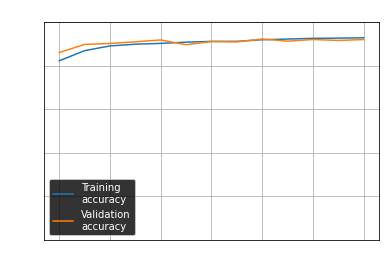

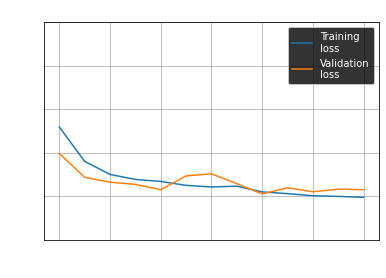

Test loss: 0.2455
Test accuracy: 0.916


Performance of CNN with SGD optimizer:



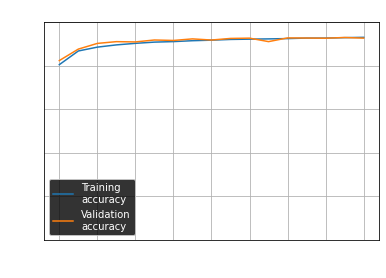

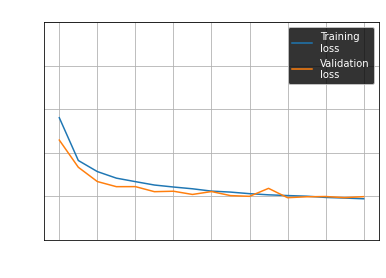

Test loss: 0.2154
Test accuracy: 0.9212


In [ ]:
# compare the first model to the same model with adam as optimizer instead
optimizer_adam = Adam(learning_rate=0.01)
cnn_adam = init_cnn(filter_size, optimizer_adam)

# train model with Adam optimizer
history_adam = cnn_adam.fit(train_images,
                train_labels,
                epochs=epochs,
                batch_size=batch_size,
                validation_split=validation_split,
                callbacks=my_callbacks,
                verbose=0)

# test the alternative model and print out the results
test_loss_adam, test_acc_adam = cnn_adam.evaluate(test_images, test_labels, verbose=0)
print("Performance of CNN with Adam optimizer:\n")
plot_performance(history_adam)
print("Test loss: {0:.{1}}".format(test_loss_adam, 4))
print("Test accuracy: {0:.{1}}\n".format(test_acc_adam, 4))

# compare Adam with first model (SGD optimizer)
print("\nPerformance of CNN with SGD optimizer:\n")
plot_performance(main_history)
print("Test loss: {0:.{1}}".format(test_loss, 4))
print("Test accuracy: {0:.{1}}".format(test_acc, 4))

#### Comparison discussion
At first glance, the SGD optimizer seems much better since it has better test results and more stable validation measures. However, the SGD optimizer utilizes learning rate decay which adjusts the learning rate each epoch, as well as Nesterov momentum which boosts the gradient. This implies that we can start with a higher learning rate of 0.01 in SGD, which does not seem appropriate in Adam due to large fluctuations in the validation loss.

On the other hand, the Adam optimizer decays its learning rates itself and should therefore be comparable to SGD with decay. Even though the optimizers have similar properties, Adam seemingly need to have a lower initial learning rate, or perhaps some additional decay added to it. So, in this case SGD is a better optimizer, but the comparison would have been more fair with a lower learning rate in Adam. 

### 4. Performance Analysis
The test results from three different runs of the first model is computed and analyzed.

In [ ]:
# compare the test results from the first model between three different runs
for i in range(3):
  # initiate new model each iteration
  cnn_compare = init_cnn(filter_size, main_optimizer)

  # print out current iteration
  print("Run no. {}:".format(i + 1))

  # train model
  history = cnn_compare.fit(train_images,
                            train_labels,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_split=validation_split,
                            callbacks=my_callbacks,
                            verbose=0)

  # test each model and print out the results 
  test_loss, test_acc = cnn_compare.evaluate(test_images,  test_labels, verbose=0)
  print("Test loss: {0:.{1}}".format(test_loss, 4))
  print("Test accuracy: {0:.{1}}\n".format(test_acc, 4)) 

Run no. 1:
Test loss: 0.2301
Test accuracy: 0.9141

Run no. 2:
Test loss: 0.2593
Test accuracy: 0.9078

Run no. 3:
Test loss: 0.2472
Test accuracy: 0.9079



#### Performance discussion
The variability in the test results are relatively large, where the accuracy differs 0.01-0.02 and the loss is up to approximately 0.06 higher compared to initial run. However, the within-variability from these runs are quite small.

The reason to this is due to the stochastic nature of the SGD optimizer, where the model itself is not random but the specific decisions made within the algorithm are made randomly.  